# This jupyter notebook is prepared by “Your Full Name”.

# 1. Load Data and perform basic EDA (4pts total)

### 1.1 import libraries: numpy, pandas, matplotlib.pyplot, seaborn, sklearn (1pt)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sk

### 1.2 Upload the dataset to your Google Drive, then using the following code, import the data to a pandas dataframe and show the count of rows and columns (0.5pt)

In [7]:
# from google.colab import drive

file_name = './hr_data_.csv' #you may need to change this line depending on the location of your file in Google Drive
with open(file_name, 'r') as file:
    df = pd.read_csv(file)

print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 8955
Number of columns: 15


### 1.3 Show the top 7 and bottom 7 rows (0.5pt)

In [8]:
top_rows = df.head(7)
print(top_rows)

bottom_rows = df.tail(7)
print(bottom_rows)


   Unnamed: 0  enrollee_id      city  city_development_index gender  \
0           1        29725   city_40                   0.776   Male   
1           4          666  city_162                   0.767   Male   
2           7          402   city_46                   0.762   Male   
3           8        27107  city_103                   0.920   Male   
4          11        23853  city_103                   0.920   Male   
5          12        25619   city_61                   0.913   Male   
6          15         6588  city_114                   0.926   Male   

       relevent_experience enrolled_university education_level  \
0   No relevent experience       no_enrollment        Graduate   
1  Has relevent experience       no_enrollment         Masters   
2  Has relevent experience       no_enrollment        Graduate   
3  Has relevent experience       no_enrollment        Graduate   
4  Has relevent experience       no_enrollment        Graduate   
5  Has relevent experience       no

### 1.4 Show if any column has null values (0.5pt)

In [9]:
null_cols = df.isnull().any()

if null_cols.any():
    print("These cols have null values:")
    print(null_cols[null_cols == True].index.tolist())
else:
    print("No cols have null values")

No cols have null values


### 1.5 Show/Plot the count of unique target labels and discuss its imbalances and possible issues in using it for classification. (1.5pt)

0.0    7472
1.0    1483
Name: target, dtype: int64


<AxesSubplot: xlabel='target', ylabel='count'>

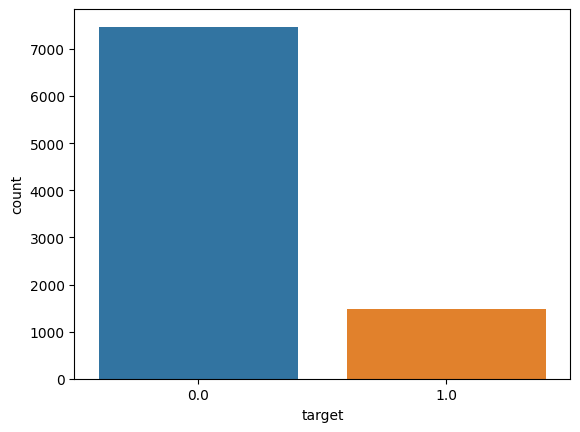

In [10]:
counts = df['target'].value_counts()
print(counts)

sb.countplot(x='target', data=df)

# 2. Feature Selection and Pre-processing (25 pts total)

## 2.1 Preprocessing City (1+1+1+1 = 4pts total)

### 2.1.1 Plot no. of records per city so that the highest city counts are shown in descending order (1pt)

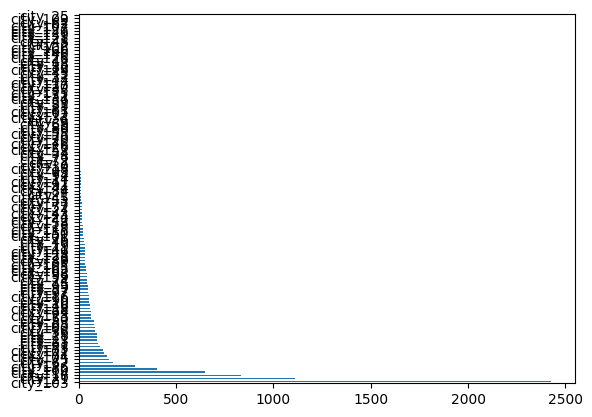

In [54]:
city_counts = df['city'].value_counts().sort_values(ascending=False)
city_counts.plot.barh()
plt.show()

### 2.1.2 How many rows belong to the count-wise top 4 cities in total and how many for the remaining? (1pt)

In [72]:
city_counts = df['city'].value_counts()
top_cities = city_counts.head(4).index.tolist()
num_rows_top_cities = city_counts.loc[top_cities].sum()
num_rows_remaining_cities = len(df) - num_rows_top_cities

print('Number of rows for top 4 cities:', num_rows_top_cities)
print('Number of rows for remaining cities', num_rows_remaining_cities)

Number of rows for top 4 cities: 8307
Number of rows for remaining cities 648


### 2.1.3 Replace the city name with city_others if the city name is not among the top 4 (1pt)

In [73]:
df['city'] = df['city'].apply(
    lambda x: 'city_others' if x not in top_cities else x
)

### 2.1.4 Show some sample data that the records have changed correctly. (1pt)

In [74]:
print(df[df['city'] == 'city_others'].head())

   Unnamed: 0  enrollee_id         city  city_development_index gender  \
0           1        29725  city_others                   0.776   Male   
1           4          666  city_others                   0.767   Male   
2           7          402  city_others                   0.762   Male   
5          12        25619  city_others                   0.913   Male   
6          15         6588  city_others                   0.926   Male   

       relevent_experience enrolled_university education_level  \
0   No relevent experience       no_enrollment        Graduate   
1  Has relevent experience       no_enrollment         Masters   
2  Has relevent experience       no_enrollment        Graduate   
5  Has relevent experience       no_enrollment        Graduate   
6  Has relevent experience       no_enrollment        Graduate   

  major_discipline  experience company_size    company_type last_new_job  \
0             STEM        15.0        50-99         Pvt Ltd           >4   
1     

## 2.2. Preprocessing Education Level (1+2+2+1 = 6pts total)

### 2.2.1. Show the unique values of education level. (1pt)

In [75]:
unique_education_levels = df['education_level'].unique()
print(unique_education_levels)

['Graduate' 'Masters' 'Phd']


### 2.2.2. Write a function named replace_labels() that can replace labels using given {old_label:new_label} dictionary (2pts)

Parameters: (1) dataframe, (2) a column name, (3) a dictionary with {old_label:new_label} mapping. 

Returns: a dataframe with specified column values replaced with the  


In [76]:
def replace_labels(df, col_name, label_dict):
    df_copy = df.copy()
    df_copy[col_name] = df_copy[col_name].replace(label_dict)
    return df_copy

### 2.2.3. Using the replace_labels() function you just created, replace education_level column with ordinal values. The mapping can be like "Graduate":0, "Masters":1, "Phd":2 . (2pt)

In [77]:
education_level_dict = {
    'Graduate': 0,
    'Masters': 1,
    'Phd': 2
}

df = replace_labels(df, 'education_level', education_level_dict)

### 2.2.4 Show some sample data that the records have changed appropriately (1pt)

In [81]:
print(df[['education_level']].head())

   education_level
0                0
1                1
2                0
3                0
4                0


## 2.3. Preprocessing company_size (2+2+1 = 5pts total)

### 2.3.1 Show the unique values of the company_size column and their counts (2pt)

In [82]:
print(df['company_size'].value_counts())

50-99        1986
100-500      1814
10000+       1449
10/49         951
1000-4999     930
<10           840
500-999       592
5000-9999     393
Name: company_size, dtype: int64


### 2.3.2 Change the values of the company_size column from 0 to 7 where e0 is <10 and 7 is 10000+. The order of the numbers should be based on the values of the column-like an ordinary variable. (2pt)
(Hint: you can use the replace_labels() function you created before.)

In [20]:
company_size_dict = {
    '<10': 0,
    '10/49': 1,
    '50-99': 2,
    '100-500': 3,
    '500-999': 4,
    '1000-4999': 5,
    '5000-9999': 6,
    '10000+': 7
}

df = replace_labels(df, 'company_size', company_size_dict)

### 2.3.3 Show the updated unique values to validate they changed appropriately (1pt)

In [85]:
print(df['company_size'].unique())
print(df['company_size'].value_counts())

['50-99' '<10' '5000-9999' '1000-4999' '10/49' '100-500' '10000+'
 '500-999']
50-99        1986
100-500      1814
10000+       1449
10/49         951
1000-4999     930
<10           840
500-999       592
5000-9999     393
Name: company_size, dtype: int64


## 2.4. Preprocessing last_new_job (1+2+1 = 4pts total)

### 2.4.1 Show unique values of the last_new_job column (1pt)

In [86]:
print(df['last_new_job'].unique())

['>4' '4' '1' '3' '2' 'never']


### 2.4.2 Convert the values of this column to never->0, 1->1,....>4 -->5 (2pt)
Hint: replace_labels()

In [91]:
last_job_dict = {
    'never': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '>4': 5
}

df = replace_labels(df, 'last_new_job', last_job_dict)

print(df['last_new_job'].unique())

[5 4 1 3 2 0]


### 2.4.3 Show the updated values (1pt)

In [92]:
print(df['last_new_job'].value_counts())

1    3838
5    1965
2    1570
3     610
4     599
0     373
Name: last_new_job, dtype: int64


## 2.5 Preprocessing other columns (2pt total)

### 2.5.1 Drop the enrollee_id, any unnamed columns, and any duplicate columns (if you created multiple columns one with original and one with updated, then remove the original one) (2pt)

In [93]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.drop('enrollee_id', axis=1)
df = df.loc[:, ~df.columns.duplicated()]

## 2.6 Feature Scaling (3+1 = 4ps total)

### 2.6.1 Use sklearn.preprocessing's MinMaxScaler to perform min max scaling to all the numeric columns (3pt)

In [94]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = scaler.fit_transform(df[num_cols])

### 2.6.2 Show some of the scaled records. (1pt)

In [96]:
print(df.head())

          city  city_development_index gender      relevent_experience  \
0  city_others                0.654691   Male   No relevent experience   
1  city_others                0.636727   Male  Has relevent experience   
2  city_others                0.626747   Male  Has relevent experience   
3     city_103                0.942116   Male  Has relevent experience   
4     city_103                0.942116   Male  Has relevent experience   

  enrolled_university  education_level major_discipline  experience  \
0       no_enrollment              0.0             STEM    0.714286   
1       no_enrollment              0.5             STEM    1.000000   
2       no_enrollment              0.0             STEM    0.619048   
3       no_enrollment              0.0             STEM    0.333333   
4       no_enrollment              0.0             STEM    0.238095   

  company_size    company_type  last_new_job  training_hours  target  \
0        50-99         Pvt Ltd           1.0        0.13

# 3. X/Y and Training/Test Split with stratified sampling (15pts in total)

### 3.1 Using a lot of features with categorical values is not memory-efficient. Use a LabelEncoder() to convert all the categorical columns to numeric labels. (This task is similar to previous assignment A1) (2pt)

In [97]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = list(df.select_dtypes(include=['object']).columns)

encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

### 3.2 Copy all the features into X and the target to Y (2pt)

In [98]:
X = df.drop('target', axis=1)
Y = df['target']

### 3.3 Show the ratio of 1 and 0 in Y. (1pt)

In [32]:
# TODO

### 3.4 Use sklearn's train_test_split() to split the data set into 70% training and 30% test sets. Set random_state to 42. We want to have the same ratio of 0 and 1 in the test set, use the stratify parameter to Y to ensure this. Then show the ratio of 1 and 0 in both train and test target. (4pt)

In [33]:
# TODO

### 3.5 Rebalancing (4+2 = 6pts)

3.5.1 Use imblearn's SMOTENC to balance the x_train


When our training set have class imbalance, we often perform over-sampling to generate synthetic data that can help in training. SMOTE is a library by imblearn for this purpose. The usage is fairly straightforward. See documentation [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC) and a brief explanation with example [here](https://medium.com/analytics-vidhya/smote-nc-in-ml-categorization-models-fo-imbalanced-datasets-8adbdcf08c25)

In [34]:
# TODO

3.5.2 Did that change the ratio in label? Confirm by printing the ratio in resampled labels.

In [35]:
# TODO

# 4. Decision Tree (20pts total)

### 4.1 Initialize a decision tree model using sklearns DecisionTreeClassifier. Use the unbalanced training set. Set a consistent value for random_state parameter so that your result is reproducible. (1pt)

In [36]:
# TODO

### 4.2 Use grid search to find out the best combination of values for the parameters: criterion, max_depth, min_samples_split, max_features. Then print the best performing parameters. (4pt)

In [37]:
# TODO

### 4.3 Add the best performing parameter set to the already-initialized Decision Tree model. Then fit it on the train dataset. (2pt)

In [38]:
# TODO

### 4.4 Import the accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score from scikitlearn's metrics package. Evaluate your Decision Tree on the Test dataset and print all the metrics. (3pt)

In [39]:
# TODO

### 4.5 Plot the tree using scikitlearn's tree package. You may need to define a large figure size using matplotlib to have an intelligible figure. (2pt)

In [40]:
# TODO

### 4.6 Initialize a new Decision Tree model, then use the best set of parameters from Step 4.3 to train it on the balanced train set that you prepared in Step 3.5.1. (3pt)

In [41]:
# TODO

### 4.7 Print the evaluation scores (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) from the training on balanced dataset. (3pt)

In [42]:
# TODO

### 4.8 Discuss any difference between evaluation results from the unbalanced train set and balanced train set. (2pt)

'#TODO'

# 5. Random Forest Classifier (12pts total)

### 5.1 Use grid search to find best combinations of the following Random Forest parameters: n_estimators, max_depth, min_samples_split and min_samples_leaf. Use your own choice of scoring, criterion, number of folds for cross-validation for the model initialization. Remember the grid search can take a while to finish. (4pt)

In [43]:
# TODO

### 5.2 Print the best combination of parameters and use it to train a Random Forest classifier model. (3pt)

In [44]:
# TODO

### 5.3  Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (5pt)

In [45]:
# TODO

# 6. Boosting Classifier (20 pts total)

## 6.1 AdaBoost Classifier (10 pts total)

### 6.1.1 Perform a grid search for best values for parameters={n_estimators, learning_rate} of an AdaBoostClassifier and the given training set. (4pt) 

In [46]:
# TODO

### 6.1.2 Train an AdaboostClassifier using the best parameter set you found in step 6.1.1 (3pt) 

In [47]:
# TODO

### 6.1.3 Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (3pt)

In [48]:
# TODO

## 6.2 Gradient Boosting Classifier (10 pts total)

### 6.2.1 Perform a grid search for best values for parameters={n_estimators, max_depth, learning_rate} of a GradientBoostingClassifier and the given training set. (4pt)

In [49]:
# TODO

### 6.2.2 Train a GradientBoostingClassifier using the best parameter set you found in step 6.2.1 (3pt) 

In [50]:
# TODO

### 6.2.3 Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (3pt)

In [51]:
# TODO

# 7. Summary Discussion (4 pts)

Which model yields the highest precision?

Which model yields the lowest recall? 

Which model yields the higest True Positive (TP)? 

Which model yields the best performance overall? 
